In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('student.csv.txt')
df.head()

,student_name,study_hours,attendance,previous_score,final_score
0,Ali,2,70,55,58
1,Ahmed,4,80,65,70
2,Sara,6,90,75,82
3,Ayesha,3,75,60,65
4,Bilal,1,60,50,52


In [3]:
df.drop(columns=['student_name'])
df.tail()

,student_name,study_hours,attendance,previous_score,final_score
6,Fatima,5,85,72,78
7,Usman,2,68,58,60
8,Zainab,6,91,77,85
9,Hamza,4,82,66,72
10,Saad,5,88,74,80


In [4]:
x = df.drop(["final_score",'student_name'], axis=1)
y = df["final_score"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [5]:
y_pred = model.predict(x_test)

In [6]:
print(y_pred[:5])
print(y_test.values[:5])


[87.99529667 58.54377713 71.62807525]
[88 58 72]


In [7]:
from sklearn.metrics import r2_score,mean_absolute_error
r2 = r2_score(y_test,y_pred) 
print('score: ',r2)

score:  0.999036885257456


In [8]:
mae = mean_absolute_error(y_test,y_pred)
print('score: ',mae)

score:  0.3068017366136028


In [9]:
from sklearn.tree  import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42)
model.fit(x_train,y_train)


,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [10]:
y_pred = model.predict(x_test)

In [11]:
print(y_pred[:5])
print(y_test.values[:5])


[85. 60. 70.]
[88 58 72]


In [12]:
from sklearn.metrics import r2_score,mean_squared_error
r2_deceision = r2_score(y_test,y_pred) 
print('score: ',r2)

score:  0.999036885257456


In [13]:
mse = mean_squared_error(y_test,y_pred)
print('score: ',mse)

score:  5.666666666666667


In [14]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [15]:
y_pred = model.predict(x_test)

In [16]:
print(y_pred[:5])
print(y_test.values[:5])


[85 60 70]
[88 58 72]


In [17]:
from sklearn.metrics import r2_score,mean_squared_error
r2_random = r2_score(y_test,y_pred) 
print('score: ',r2)

score:  0.999036885257456


In [18]:
mse = mean_squared_error(y_test,y_pred)
print('score: ',mse)

score:  5.666666666666667


In [19]:
import pandas as pd

scores_df = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree", "Random Forest"],
    "Score": [r2,r2_deceision,r2_random]
})

scores_df


,Model,Score
0,Linear Regression,0.999037
1,Decision Tree,0.962278
2,Random Forest,0.962278


In [20]:
import pandas as pd

In [21]:
df = pd.read_csv('student.csv.txt')
df.head()

,student_name,study_hours,attendance,previous_score,final_score
0,Ali,2,70,55,58
1,Ahmed,4,80,65,70
2,Sara,6,90,75,82
3,Ayesha,3,75,60,65
4,Bilal,1,60,50,52


In [22]:
df.drop(columns='student_name')

,study_hours,attendance,previous_score,final_score
0,2,70,55,58
1,4,80,65,70
2,6,90,75,82
3,3,75,60,65
4,1,60,50,52
5,7,92,80,88
6,5,85,72,78
7,2,68,58,60
8,6,91,77,85
9,4,82,66,72


In [23]:
x = df.drop(["final_score",'student_name'], axis=1)
y = df["final_score"]



In [24]:

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(x,y)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [25]:
importances = model.feature_importances_

In [26]:

model_importance_df = pd.DataFrame({
    'feature':x.columns,
    'importance':importances
}).sort_values(by='importance',ascending=False)

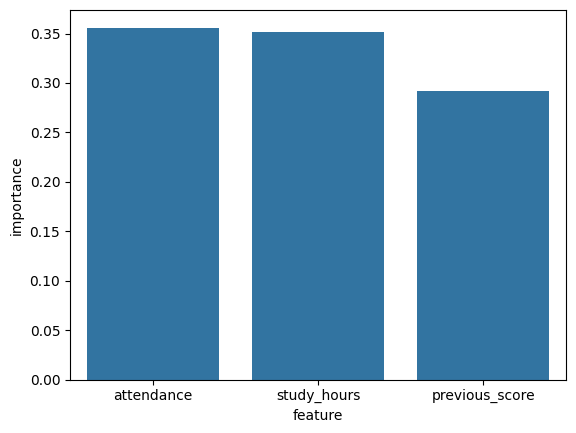

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x='feature',y='importance',data=model_importance_df)
plt.show()

In [28]:
import pickle
import os

os.makedirs("models", exist_ok=True)

with open("models/student_rf_v1.pkl", "wb") as file:
    pickle.dump(model, file)


In [29]:
model

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [30]:
new_student = pd.DataFrame({'study_hours':[7],
                            'attendance':[85],
                            'previous_score':[80]})

In [31]:
prediction = model.predict(new_student)

In [32]:
prediction

array([82.88])

In [33]:
import pickle
import streamlit as st
import pandas as pd

In [34]:
with open('student_rf_v1.pkl','rb') as f:
    model = pickle.load(f)

In [35]:
study_hours = st.slider('study per hours',min_value=0,max_value=12,value=7)
attendence = st.slider('attendence ',min_value=50,max_value=100,value=75)
previous_score = st.slider('precvious_score:',min_value=60,max_value=100,value=77)

2026-02-07 19:44:29.289 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-07 19:44:29.292 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-07 19:44:29.293 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-07 19:44:29.295 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-07 19:44:31.077 
  command:

    streamlit run C:\Users\MasteR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel_launcher.py [ARGUMENTS]
2026-02

In [36]:
if st.button('prediction final score'):
    new_student = pd.DataFrame({
        'study_hours':[study_hours],
        'attendence':[attendence],
        'previous_score':[previous_score]
    })

    prediction = model.predict(new_student)
    st.success(f"Predicted Final Score: **{prediction[0]:.2f}**")

2026-02-07 19:44:32.421 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-07 19:44:32.423 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-07 19:44:32.425 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-07 19:44:32.428 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-07 19:44:32.429 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-07 19:44:32.430 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
